(pixel_classification.apoc)=
# Pixelklassifizierung auf OpenCL-kompatiblen GPUs
Alternativ zur Objekt- oder "Instanz"-Segmentierung können wir auch eine semantische Segmentierung durch Klassifizierung von Pixeln durchführen.

Beginnen wir mit dem Laden eines Beispielbildes und einiger Grundwahrheit:

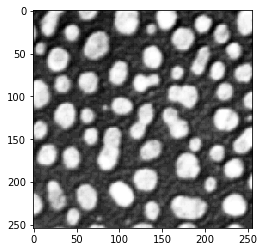

In [1]:
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np
import apoc
import pyclesperanto_prototype as cle

image = imread('../../data/blobs.tif')
cle.imshow(image)

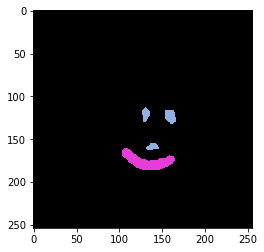

In [2]:
manual_annotations = imread('../../data/blobs_annotations.tif')

from skimage.io import imshow
cle.imshow(manual_annotations, labels=True)

## Training
Wir trainieren jetzt einen PixelClassifier, der im Hintergrund ein [scikit-learn RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) ist. Nach dem Training wird der Klassifizierer in [clij-kompatiblen OpenCL-Code](https://github.com/clEsperanto/clij-opencl-kernels) umgewandelt und unter einem gegebenen Dateinamen auf der Festplatte gespeichert.

In [3]:
# define features: original image, a blurred version and an edge image
features = "original gaussian_blur=2 sobel_of_gaussian_blur=2"

# this is where the model will be saved
cl_filename = 'my_model.cl'

apoc.erase_classifier(cl_filename)
clf = apoc.PixelClassifier(opencl_filename=cl_filename)
clf.train(features, manual_annotations, image)

## Vorhersage
Der Klassifizierer kann dann verwendet werden, um alle Pixel im gegebenen Bild zu klassifizieren. Ausgangspunkt ist wieder der Feature-Stack. Daher muss der Benutzer sicherstellen, dass für das Training und die Vorhersage die gleichen Features verwendet werden.

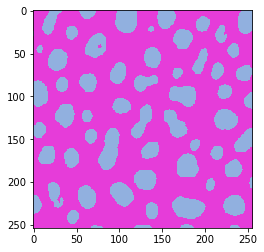

In [4]:
result = clf.predict(image=image)
cle.imshow(result, labels=True)